# MODEL 1

In [164]:
# Step 1, construct the dataset
from PIL import Image   # import pillow for image processing
import numpy as np      # import numpy for math operations

# load and process the training images of dimension 900x900

# first image
Plants = Image.open('Plants.jpg')   # load the image
Plants = np.array(Plants)           # convert the image to a numpy array

# separate the image into its RGB components
Plants_R = Plants[:,:,0]
Plants_G = Plants[:,:,1]
Plants_B = Plants[:,:,2]

# divide the image into 50x50 blocks
# for every possible block
Plants_R_blocks = []
Plants_G_blocks = []
Plants_B_blocks = []
for i in range(0, 850):
    for j in range(0, 850):
        # get the blocks
        R_block = Plants_R[i:i+50, j:j+50]
        G_block = Plants_G[i:i+50, j:j+50]
        B_block = Plants_B[i:i+50, j:j+50]
        # flatten the blocks
        R_block = R_block.flatten()
        G_block = G_block.flatten()
        B_block = B_block.flatten()
        # add the blocks to the list
        Plants_R_blocks.append(R_block)
        Plants_G_blocks.append(G_block)
        Plants_B_blocks.append(B_block)
    
# create the training dataset
# for every block, remove the last value and add it to the label
Plants_R_train_data = []
Plants_G_train_data = []
Plants_B_train_data = []
Plants_R_train_labels = []
Plants_G_train_labels = []
Plants_B_train_labels = []
for i in range(len(Plants_R_blocks)):
    # get the data and label
    R_data = Plants_R_blocks[i][:-1]
    G_data = Plants_G_blocks[i][:-1]
    B_data = Plants_B_blocks[i][:-1]
    R_label = Plants_R_blocks[i][-1]
    G_label = Plants_G_blocks[i][-1]
    B_label = Plants_B_blocks[i][-1]
    # add the data and label to the list
    Plants_R_train_data.append(R_data)
    Plants_G_train_data.append(G_data)
    Plants_B_train_data.append(B_data)
    Plants_R_train_labels.append(R_label)
    Plants_G_train_labels.append(G_label)
    Plants_B_train_labels.append(B_label)

# second image
Statue = Image.open('Statue.jpg') # load the image
Statue = np.array(Statue)         # convert the image to a numpy array
# separate the image into its RGB components
Statue_R = Statue[:,:,0]
Statue_G = Statue[:,:,1]
Statue_B = Statue[:,:,2]
# divide the image into 50x50 blocks
# for every possible block
Statue_R_blocks = []
Statue_G_blocks = []
Statue_B_blocks = []
for i in range(0, 850):
    for j in range(0, 850):
        # get the blocks
        R_block = Statue_R[i:i+50, j:j+50]
        G_block = Statue_G[i:i+50, j:j+50]
        B_block = Statue_B[i:i+50, j:j+50]
        # flatten the blocks
        R_block = R_block.flatten()
        G_block = G_block.flatten()
        B_block = B_block.flatten()
        # add the blocks to the list
        Statue_R_blocks.append(R_block)
        Statue_G_blocks.append(G_block)
        Statue_B_blocks.append(B_block)

# create the training dataset
# for every block, remove the last value and add it to the label
Statue_R_train_data = []
Statue_G_train_data = []
Statue_B_train_data = []
Statue_R_train_labels = []
Statue_G_train_labels = []
Statue_B_train_labels = []
for i in range(len(Statue_R_blocks)):
    # get the data and label
    R_data = Statue_R_blocks[i][:-1]
    G_data = Statue_G_blocks[i][:-1]
    B_data = Statue_B_blocks[i][:-1]
    R_label = Statue_R_blocks[i][-1]
    G_label = Statue_G_blocks[i][-1]
    B_label = Statue_B_blocks[i][-1]
    # add the data and label to the list
    Statue_R_train_data.append(R_data)
    Statue_G_train_data.append(G_data)
    Statue_B_train_data.append(B_data)
    Statue_R_train_labels.append(R_label)
    Statue_G_train_labels.append(G_label)
    Statue_B_train_labels.append(B_label)

In [171]:
# divide the data into training and testing sets, 80% training, 20% testing
# for the red channel
Plants_R_data = list(zip(Plants_R_train_data, Plants_R_train_labels))
Statue_R_data = list(zip(Statue_R_train_data, Statue_R_train_labels))
Plants_R_train = Plants_R_data[:int(len(Plants_R_data)*0.8)]
Plants_R_test = Plants_R_data[int(len(Plants_R_data)*0.8):]
Statue_R_train = Statue_R_data[:int(len(Statue_R_data)*0.8)]
Statue_R_test = Statue_R_data[int(len(Statue_R_data)*0.8):]

# for the green channel
Plants_G_data = list(zip(Plants_G_train_data, Plants_G_train_labels))
Statue_G_data = list(zip(Statue_G_train_data, Statue_G_train_labels))
Plants_G_train = Plants_G_data[:int(len(Plants_G_data)*0.8)]
Plants_G_test = Plants_G_data[int(len(Plants_G_data)*0.8):]
Statue_G_train = Statue_G_data[:int(len(Statue_G_data)*0.8)]
Statue_G_test = Statue_G_data[int(len(Statue_G_data)*0.8):]

# for the blue channel
Plants_B_data = list(zip(Plants_B_train_data, Plants_B_train_labels))
Statue_B_data = list(zip(Statue_B_train_data, Statue_B_train_labels))
Plants_B_train = Plants_B_data[:int(len(Plants_B_data)*0.8)]
Plants_B_test = Plants_B_data[int(len(Plants_B_data)*0.8):]
Statue_B_train = Statue_B_data[:int(len(Statue_B_data)*0.8)]
Statue_B_test = Statue_B_data[int(len(Statue_B_data)*0.8):]

# shuffle the data
import random
random.shuffle(Plants_R_train)
random.shuffle(Plants_G_train)
random.shuffle(Plants_B_train)
random.shuffle(Statue_R_train)
random.shuffle(Statue_G_train)
random.shuffle(Statue_B_train)

In [129]:
# import the testing images
from PIL import Image
import numpy as np

# first image
Leaves_Masked = Image.open('Leaves_Masked.jpg') # load the image
Leaves_Masked = np.array(Leaves_Masked)         # convert the image to a numpy array
# separate the image into its RGB components
Leaves_Masked_R = Leaves_Masked[:,:,0]
Leaves_Masked_G = Leaves_Masked[:,:,1]
Leaves_Masked_B = Leaves_Masked[:,:,2]

# second image
Wood_Masked = Image.open('Wood_Masked.jpg') # load the image
Wood_Masked = np.array(Wood_Masked)           # convert the image to a numpy array
# separate the image into its RGB components
Wood_Masked_R = Wood_Masked[:,:,0]
Wood_Masked_G = Wood_Masked[:,:,1]
Wood_Masked_B = Wood_Masked[:,:,2]


# define a function to take in an image, location, and value, update the image, and return the next testing data
def update_image(image, x, y, value = None):
    if value is not None:
        image[x][y] = value    # update the image
        # get the location for the next testing datapoint
        if x == 899:
            x = -1
            y += 1
        x += 1
    # get the next testing datapoint
    next_data = image[x-50:x, y-50:y]
    next_data = next_data.flatten()
    next_data = next_data[:-1]
    return next_data

In [160]:
# helper function to display images 
import matplotlib.pyplot as plt
%matplotlib inline

# define a function to display an image given its RGB components
def display_image(R, G, B):
    image = np.zeros((R.shape[0], R.shape[1], 3))   # create the image
    for i in range(R.shape[0]):                     # for every pixel in the image
        for j in range(R.shape[1]):
            image[i][j][0] = R[i][j]                # set the pixel RGB values
            image[i][j][1] = G[i][j]
            image[i][j][2] = B[i][j]
    
    # display the image without axes
    plt.axis('off')
    plt.imshow(image.astype(np.uint8))    # display the image
    plt.show()

In [100]:
# define the leaky ReLU activation function
def relu(z):
    return z if z > 0 else 0.1*z

# define the gradient of the leaky Relu activation function
def grad_relu(z):
    return 1 if z > 0 else 0.1

# define the loss function
def loss_function(true, pred):
    return (true-pred)**2

# define the gradient of the loss
def grad_loss(true, pred):
    return 2*(pred-true)

# define a function to convert a decimal to an int between 0 and 255
def convert_to_int(value):
    value = int(value)
    if value > 255:
        value = 255
    elif value < 0:
        value = 0
    else:
        value = int(value)
    return value

In [101]:
# create a perceptron class
class Perceptron:
    # initialize the perceptron
    def __init__(self, num_weights, last_layer=False):
        # randomly initialize the weights using a normal distribution
        self.weights = [np.random.normal(0, 0.01) for _ in range(num_weights)]
        self.last_layer = last_layer
        self.gradient_val = None    # the gradient of the output with respect to the loss
        self.output_val = None      # the most recent output of the perceptron
    
    # define the output of the perceptron
    def output(self, x):
        self.output_val = relu(np.dot(x, self.weights)) # calculate the dot product of the weights and the input
        self.output_val = convert_to_int(self.output_val) if self.last_layer else self.output_val
        return self.output_val
    
    # define the gradient of the output of the perceptron
    def gradient(self, true=None, pred=None, next_layer=None, this_layer_outputs=None):
        # calculate the gradient of the output of the perceptron with respect to the loss
        if self.last_layer:                                     # if this is the last layer
            self.gradient_val = grad_loss(true, pred)  # calculate the gradient of the loss
        else:                                                   # if this is not the last layer    
            sum = 0
            for p in range(len(next_layer)):                    # for each perceptron in the next layer
                p_grad = next_layer[p].gradient_val             # get the gradient of the next layer     
                act_grad = grad_relu(np.dot(next_layer[p].weights, this_layer_outputs)) # get the gradient of the activation function
                p_weight = next_layer[p].weights[p]             # get the weight of the perceptron 
                sum += p_grad*p_weight*act_grad                 # add the contribution to the gradient
            self.gradient_val = sum                             # set the gradient of the perceptron
        return self.gradient_val                                # return the gradient of the perceptron
    
    # define the weight update function
    def update(self, learning_rate, prev_layer_outputs):
        # update the weights of the perceptron   
        for i in range(len(self.weights)):
            # use the equation from the lecture notes
            self.weights[i] -= learning_rate * self.gradient_val * grad_relu(np.dot(self.weights, prev_layer_outputs)) * prev_layer_outputs[i]
        return self.weights                                    

# create a layer class
class Layer:
    # initialize the layer
    def __init__(self, num_perceptrons, num_weights, last_layer=False):
        # create the perceptrons in the layer
        self.perceptrons = [Perceptron(num_weights, last_layer) for _ in range(num_perceptrons)]
        self.outputs = None     # store the outputs of the perceptrons in the layer

    # define the output function
    def output(self, x):
        # calculate the output of the layer
        self.outputs = [p.output(x) for p in self.perceptrons]  # calculate the output of each perceptron
        return self.outputs

    # define the gradient function
    def gradient(self, true=None, pred=None, next_layer=None):
        # calculate the gradient of the layer
        for i in range(len(self.perceptrons)):                                  # for each perceptron in the layer
            self.perceptrons[i].gradient(true, pred, next_layer, self.outputs)  # calculate the gradient of the perceptron
        return self.perceptrons

    # define the weight update function
    def update(self, learning_rate, prev_layer_outputs):
        # update the weights of the layer
        for p in self.perceptrons:                      # for each perceptron in the layer
            p.update(learning_rate, prev_layer_outputs) # update the weights of the perceptron

# create a neural network class
class NeuralNetwork:
    # initialize the neural network
    def __init__(self, layer_sizes):
        # create the layers in the neural network
        self.layers = [Layer(layer_sizes[i], layer_sizes[i-1], i==len(layer_sizes)-1) for i in range(1, len(layer_sizes))]

    # define the output function
    def output(self, x):
        # calculate the output of the neural network
        for l in self.layers:
            x = l.output(x)
        return x

    # define the gradient function
    def gradient(self, true, pred):
        # calculate the gradient of the neural network
        for i in range(len(self.layers)-1, -1, -1):
            self.layers[i].gradient(true, pred, self.layers[i+1].perceptrons if i < len(self.layers)-1 else None)
        return self.layers

    # define the weight update function
    def update(self, learning_rate):
        # update the weights of the neural network
        for i in range(len(self.layers)-1, 0, -1):
            self.layers[i].update(learning_rate, self.layers[i-1].outputs if i > 0 else None)

    # define the training function
    def train(self, data, learning_rate, steps):
        # train the neural network
        losses = []                                     # store the losses
        for s in range(steps):                          # for each step
            loss = 0                                    # initialize the loss
            for i in range(len(data)):                # for each input
                pred = self.output(data[i][0])[0]        # calculate the output of the neural network
                self.gradient(data[i][1], pred)         # calculate the gradient of the neural network
                self.update(learning_rate)              # update the weights of the neural network
                loss += loss_function(data[i][1], pred) # add the loss to the total loss
            losses.append(loss/len(data))                         # add the loss to the list of losses
        return losses                                   # return the list of losses      

In [114]:
# build the neural networks
red_net = NeuralNetwork([2499, 16, 1]) # create a neural network for the red channel
green_net = NeuralNetwork([2499, 16, 1]) # create a neural network for the green channel
blue_net = NeuralNetwork([2499, 16, 1]) # create a neural network for the blue channel

# train the neural networks on both training sets
losses_r_1 = red_net.train(Plants_R_train, 0.001, 1)     # train the red network on the plants training set
losses_r_2 = red_net.train(Statue_R_train, 0.001, 1)     # train the red network on the statue training set

losses_g_1 = green_net.train(Plants_G_train, 0.001, 1)   # train the green network on the plants training set
losses_g_2 = green_net.train(Statue_G_train, 0.001, 1)   # train the green network on the statue training set

losses_b_1 = blue_net.train(Plants_B_train, 0.001, 1)    # train the blue network on the plants training set
losses_b_2 = blue_net.train(Statue_B_train, 0.001, 1)    # train the blue network on the statue training set

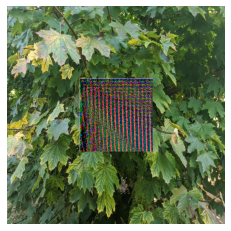

In [166]:
# use the networks to fill in the masked parts of the images
# copy the testing data
Leaves_R = np.array([r.copy() for r in Leaves_Masked_R])  # copy the red channel
Leaves_G = np.array([g.copy() for g in Leaves_Masked_G])  # copy the green channel
Leaves_B = np.array([b.copy() for b in Leaves_Masked_B])  # copy the blue channel

Leaves_R_datapoint = update_image(image=Leaves_R, x=301, y=301, value=None)  # get the first datapoint for the red channel
Leaves_G_datapoint = update_image(image=Leaves_G, x=301, y=301, value=None)  # get the first datapoint for the green channel
Leaves_B_datapoint = update_image(image=Leaves_B, x=301, y=301, value=None)  # get the first datapoint for the blue channel

red_predictions = []    # store the red predictions
green_predictions = []  # store the green predictions
blue_predictions = []   # store the blue predictions

for i in range(300):        # for each row in the image
    for j in range(300):    # for each column in the image
        red_prediction = red_net.output(Leaves_R_datapoint)[0]     # get the prediction for the red channel
        green_prediction = green_net.output(Leaves_G_datapoint)[0] # get the prediction for the green channel
        blue_prediction = blue_net.output(Leaves_B_datapoint)[0]   # get the prediction for the blue channel

        red_predictions.append(red_prediction)                  # add the prediction to the list of predictions
        green_predictions.append(green_prediction)              # add the prediction to the list of predictions
        blue_predictions.append(blue_prediction)                # add the prediction to the list of predictions
        
        Leaves_R_datapoint = update_image(image=Leaves_R, x=301+j, y=301+i, value=red_prediction)   # update the red channel
        Leaves_G_datapoint = update_image(image=Leaves_G, x=301+j, y=301+i, value=green_prediction) # update the green channel
        Leaves_B_datapoint = update_image(image=Leaves_B, x=301+j, y=301+i, value=blue_prediction)  # update the blue channel

# create the image
display_image(Leaves_R, Leaves_G, Leaves_B)

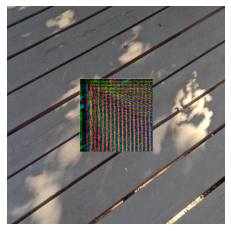

In [170]:
# copy the testing data
Wood_R = np.array([r.copy() for r in Wood_Masked_R])  # copy the red channel
Wood_G = np.array([g.copy() for g in Wood_Masked_G])  # copy the green channel
Wood_B = np.array([b.copy() for b in Wood_Masked_B])  # copy the blue channel

Wood_R_datapoint = update_image(image=Wood_R, x=301, y=301, value=None)  # get the first datapoint for the red channel
Wood_G_datapoint = update_image(image=Wood_G, x=301, y=301, value=None)  # get the first datapoint for the green channel
Wood_B_datapoint = update_image(image=Wood_B, x=301, y=301, value=None)  # get the first datapoint for the blue channel

red_predictions = []    # store the red predictions
green_predictions = []  # store the green predictions
blue_predictions = []   # store the blue predictions

for i in range(300):        # for each row in the image
    for j in range(300):    # for each column in the image
        red_prediction = red_net.output(Wood_R_datapoint)[0]     # get the prediction for the red channel
        green_prediction = green_net.output(Wood_G_datapoint)[0] # get the prediction for the green channel
        blue_prediction = blue_net.output(Wood_B_datapoint)[0]   # get the prediction for the blue channel

        red_predictions.append(red_prediction)                  # add the prediction to the list of predictions
        green_predictions.append(green_prediction)              # add the prediction to the list of predictions
        blue_predictions.append(blue_prediction)                # add the prediction to the list of predictions

        Wood_R_datapoint = update_image(image=Wood_R, x=301+j, y=301+i, value=red_prediction)   # update the red channel
        Wood_G_datapoint = update_image(image=Wood_G, x=301+j, y=301+i, value=green_prediction) # update the green channel
        Wood_B_datapoint = update_image(image=Wood_B, x=301+j, y=301+i, value=blue_prediction)  # update the blue channel

# create the image
display_image(Wood_R, Wood_G, Wood_B)

# MODEL 2

In [116]:
# QUESTION 3 CODE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
# decision tree class
class DecisionTreeNode:
    # initialize the decision tree node
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # the feature to split on
        self.threshold = threshold          # the threshold of the feature to split on
        self.left = left                    # the left subtree
        self.right = right                  # the right subtree
        self.value = value                  # if a terminal node, the value of the prediction (otherwise None)
    
    # create a prediction method
    def predict(self, X):
        if self.value is not None:                  # if a terminal node
            return self.value                       # return the prediction value
        if X[self.feature_index] < self.threshold:  # if not a terminal node and the value of the feature is below the threshold
            return self.left.predict(X)             # go down the left subtree
        return self.right.predict(X)                # otherwise, go down the right subtree

# recursively build a decision tree from a data set
def build_decision_tree_depth(data_set, max_depth=14, depth=1):
   
   # base case
    if depth > max_depth or len(data_set) < 2:
        return DecisionTreeNode(value=np.mean([Y for X, Y in data_set]))
        
    # recursive case
    else:
        # find the feature with the highest correlation to Y
        best_feature = 0
        best_correlation = 0
        
        Ys = [Y for (X, Y) in data_set]                     # get the Y values
        Ys_mean = np.mean(Ys)                               # get the mean of the Y values
        for feature in range(len(data_set[0][0])):          # for each feature
            Xs_feature = [X[feature] for X, Y in data_set]  # get the values of the feature
            Xs_feature_mean = np.mean(Xs_feature)           # get the mean of the feature values

            # Calculate the correlation
            cov_xi_y = (np.dot(Xs_feature, Ys)/len(Xs_feature)) - (Xs_feature_mean*Ys_mean) # calculate the covariance betwean x and y
            var_xi = np.mean([x**2 for x in Xs_feature]) - Xs_feature_mean**2               # calculate the variance of x
            var_y = np.mean([y**2 for y in Ys]) - Ys_mean**2                                # calculate the variance of y
            correlation = cov_xi_y/(np.sqrt(var_xi*var_y))                                  # calculate the correlation between x and y

            if abs(correlation) > best_correlation:                                         # if the absolute correlation is better than the previous best
                best_correlation = abs(correlation)                                         # update the best correlation
                best_feature = feature                                                      # update the best feature
        
        # find the best threshold to split on
        best_feature_values = [X[best_feature] for X, Y in data_set]                        # get the values of the best feature
        best_feature_values.sort()                                                          # sort the values of the best feature
        best_feature_values = *set(best_feature_values),                                    # remove duplicates
        
        if len(best_feature_values) == 1:                                                   # if there is only one value for the best feature
            return DecisionTreeNode(value=np.mean([Y for X, Y in data_set]))                # return a terminal node with the mean of the Y values
        
        # otherwise, create a list of potential thresholds
        middle_thresholds = [(best_feature_values[i] + best_feature_values[i+1])/2 for i in range(len(best_feature_values)-1)]
        best_threshold = middle_thresholds[0]                                             # set the best threshold to the first threshold   
        best_threshold_error = np.Inf                                                     # set the best threshold error to infinity
        
        # find the threshold with the lowest error
        for threshold in middle_thresholds:
            # partition the data based on the threshold
            left = [data for data in data_set if data[0][best_feature] < threshold]       
            right = [data for data in data_set if data[0][best_feature] >= threshold]  

            # calculate the error of the partitioning
            left_error = np.var([Y for (X, Y) in left])     # left error is the variance of the Y values in the left partition                                                 
            right_error = np.var([Y for (X, Y) in right])   # right error is the variance of the Y values in the right partition
            # the total error is the weighted sum of th left and right errors
            total_error = (len(left)/len(data_set))*left_error + (len(right)/len(data_set))*right_error

            # update the best threshold
            if total_error < best_threshold_error:          # if the total error is less than the best threshold error               
                best_threshold_error = total_error          # update the best threshold error
                best_threshold = threshold                  # update the best threshold
            
        # partition the data based on the best threshold
        left = [data for data in data_set if data[0][best_feature] < best_threshold]
        right = [data for data in data_set if data[0][best_feature] >= best_threshold]

        # Build the left and right subtrees using the partition
        left_subtree = build_decision_tree_depth(left, max_depth, depth+1)
        right_subtree = build_decision_tree_depth(right, max_depth, depth+1)

        # Return the decision tree
        return DecisionTreeNode(best_feature, best_threshold, left_subtree, right_subtree)

In [ ]:
# combine the statue and plants data sets for the tree based models
Combined_R_Train = np.concatenate((Statue_R_train, Plants_R_train))
Combined_G_Train = np.concatenate((Statue_G_train, Plants_G_train))
Combined_B_Train = np.concatenate((Statue_B_train, Plants_B_train))

Combined_R_Test = np.concatenate((Statue_R_train, Plants_R_test))
Combined_G_Test = np.concatenate((Statue_G_train, Plants_G_test))
Combined_B_Test = np.concatenate((Statue_B_train, Plants_B_test))

# shuffle the training data
np.random.shuffle(Combined_R_Train)
np.random.shuffle(Combined_G_Train)
np.random.shuffle(Combined_B_Train)

In [ ]:
# build a decision tree from the data, use only the first 12000 data points
red_tree = build_decision_tree_depth(Combined_R_Train[:12000])     # build a decision tree for the red channel
green_tree = build_decision_tree_depth(Combined_G_Train[:12000])   # build a decision tree for the green channel
blue_tree = build_decision_tree_depth(Combined_B_Train[:12000])    # build a decision tree for the blue channel

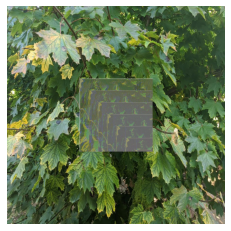

In [175]:
# use the decision trees to fill in the masked parts of the images
# copy the testing data
Leaves_R = np.array([r.copy() for r in Leaves_Masked_R])  # copy the red channel
Leaves_G = np.array([g.copy() for g in Leaves_Masked_G])  # copy the green channel
Leaves_B = np.array([b.copy() for b in Leaves_Masked_B])  # copy the blue channel

Leaves_R_datapoint = update_image(image=Leaves_R, x=301, y=301, value=None)  # get the first datapoint for the red channel
Leaves_G_datapoint = update_image(image=Leaves_G, x=301, y=301, value=None)  # get the first datapoint for the green channel
Leaves_B_datapoint = update_image(image=Leaves_B, x=301, y=301, value=None)  # get the first datapoint for the blue channel

red_predictions = []    # store the red predictions
green_predictions = []  # store the green predictions
blue_predictions = []   # store the blue predictions

for i in range(300):        # for each row in the image
    for j in range(300):    # for each column in the image
        red_prediction = red_tree.predict(Leaves_R_datapoint)    # get the prediction for the red channel
        green_prediction = green_tree.predict(Leaves_G_datapoint) # get the prediction for the green channel
        blue_prediction = blue_tree.predict(Leaves_B_datapoint)   # get the prediction for the blue channel

        red_predictions.append(red_prediction)      # add the prediction to the list of predictions
        green_predictions.append(green_prediction)  # add the prediction to the list of predictions
        blue_predictions.append(blue_prediction)    # add the prediction to the list of predictions
        
        Leaves_R_datapoint = update_image(image=Leaves_R, x=301+i, y=301+j, value=red_prediction)   # update the red channel
        Leaves_G_datapoint = update_image(image=Leaves_G, x=301+i, y=301+j, value=green_prediction) # update the green channel
        Leaves_B_datapoint = update_image(image=Leaves_B, x=301+i, y=301+j, value=blue_prediction)  # update the blue channel

# create the image
display_image(Leaves_R, Leaves_G, Leaves_B)

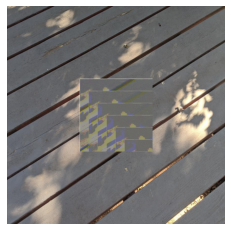

In [176]:
# copy the testing data
Wood_R = np.array([r.copy() for r in Wood_Masked_R])  # copy the red channel
Wood_G = np.array([g.copy() for g in Wood_Masked_G])  # copy the green channel
Wood_B = np.array([b.copy() for b in Wood_Masked_B])  # copy the blue channel

Wood_R_datapoint = update_image(image=Wood_R, x=301, y=301, value=None)  # get the first datapoint for the red channel
Wood_G_datapoint = update_image(image=Wood_G, x=301, y=301, value=None)  # get the first datapoint for the green channel
Wood_B_datapoint = update_image(image=Wood_B, x=301, y=301, value=None)  # get the first datapoint for the blue channel

red_predictions = []    # store the red predictions
green_predictions = []  # store the green predictions
blue_predictions = []   # store the blue predictions

for i in range(300):        # for each row in the image
    for j in range(300):    # for each column in the image
        red_prediction = red_tree.predict(Wood_R_datapoint)        # get the prediction for the red channel
        green_prediction = green_tree.predict(Wood_G_datapoint)    # get the prediction for the green channel
        blue_prediction = blue_tree.predict(Wood_B_datapoint)      # get the prediction for the blue channel

        red_predictions.append(red_prediction)                  # add the prediction to the list of predictions
        green_predictions.append(green_prediction)              # add the prediction to the list of predictions
        blue_predictions.append(blue_prediction)                # add the prediction to the list of predictions

        Wood_R_datapoint = update_image(image=Wood_R, x=301+j, y=301+i, value=red_prediction)   # update the red channel
        Wood_G_datapoint = update_image(image=Wood_G, x=301+j, y=301+i, value=green_prediction) # update the green channel
        Wood_B_datapoint = update_image(image=Wood_B, x=301+j, y=301+i, value=blue_prediction)  # update the blue channel

# create the image
display_image(Wood_R, Wood_G, Wood_B)